# Neural Networks Basics (Perceptron, Activation Functions)

## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Generate a Synthetic Dataset

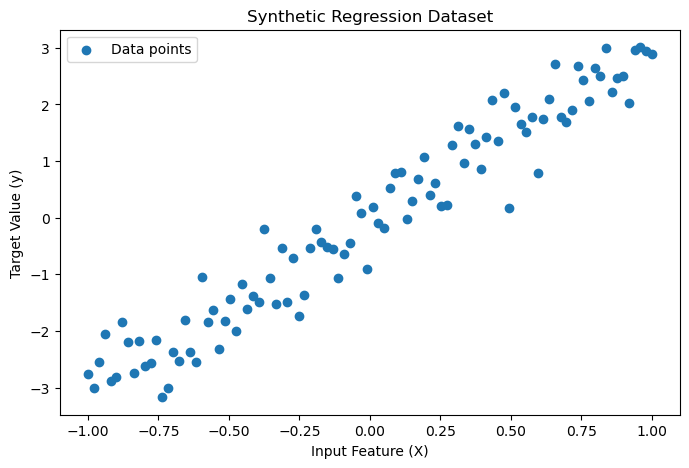

In [7]:
# Generate a synthetic dataset for regression
def generate_data(num_samples):
    X = np.linspace(-1, 1, num_samples)
    y = 3*X + np.random.randn(*X.shape) * 0.5  # Linear relation with some noise
    return X, y

# Number of samples
num_samples = 100

# Generate data
X, y = generate_data(num_samples)

# Plot the dataset
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data points")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target Value (y)")
plt.title("Synthetic Regression Dataset")
plt.legend()
plt.show()

## Initialize Weights and Biases

In [10]:
# Initialize weights and biases for the network
def initialize_parameters(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# Parameters for a network with 1 input, 1 hidden layer (10 neurons), and 1 output
input_dim = 1
hidden_dim = 10
output_dim = 1

W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_dim, output_dim)

## Define Activation Functions (ReLU and Sigmoid)

In [13]:
# Define the ReLU activation function
def relu(Z):
    return np.maximum(0, Z)

# Define the Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

## Forward Propagation

In [16]:
# Forward propagation to compute the network output
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Hidden layer activation (ReLU)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Output layer (linear activation for regression)
    return Z1, A1, Z2, A2

##  Compute the Cost (Mean Squared Error)

In [19]:
# Compute the Mean Squared Error (MSE)
def compute_cost(A2, Y):
    m = Y.shape[0]
    cost = (1/m) * np.sum((A2 - Y) ** 2)
    return cost

## Backward Propagation

In [22]:
# Backward propagation to compute gradients
def backward_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]
    
    # Output layer gradients
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

## Gradient Descent Update

In [25]:
# Update the weights and biases using gradient descent
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

## Training the Neural Network

In [28]:
# Training the neural network
def train_neural_network(X, Y, W1, b1, W2, b2, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Compute cost
        cost = compute_cost(A2, Y)
        costs.append(cost)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return W1, b1, W2, b2, costs

# Reshape X and Y for the network
X_train = X.reshape(-1, 1)
Y_train = y.reshape(-1, 1)

# Set training parameters
num_iterations = 1000
learning_rate = 0.01

# Train the neural network
W1, b1, W2, b2, costs = train_neural_network(X_train, Y_train, W1, b1, W2, b2, num_iterations, learning_rate)

Iteration 0: Cost = 2.535643365394744
Iteration 100: Cost = 0.255979285316846
Iteration 200: Cost = 0.2258238935784002
Iteration 300: Cost = 0.21996466555957347
Iteration 400: Cost = 0.21670085671389683
Iteration 500: Cost = 0.21424636085129184
Iteration 600: Cost = 0.21208962499312717
Iteration 700: Cost = 0.21006904627628992
Iteration 800: Cost = 0.20803480190972276
Iteration 900: Cost = 0.2058379965515209


## Plot the Training Loss

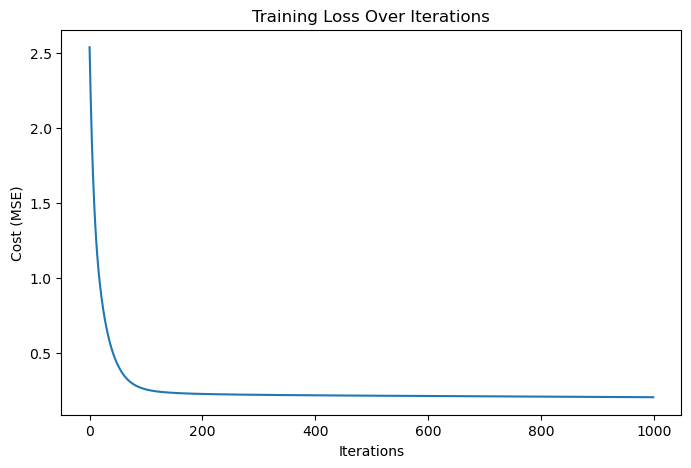

In [31]:
# Plot the training loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

## Make Predictions and Visualize the Results

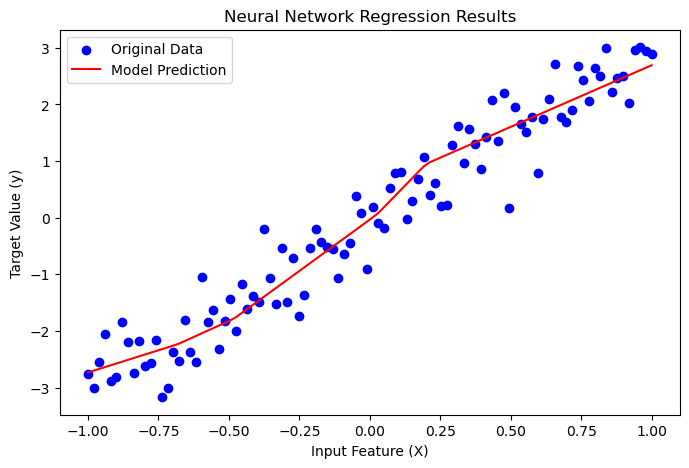

In [34]:
# Make predictions with the trained network
_, _, _, Y_pred = forward_propagation(X_train, W1, b1, W2, b2)

# Plot the original data and the predictions
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Original Data", color="blue")
plt.plot(X, Y_pred, label="Model Prediction", color="red")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target Value (y)")
plt.title("Neural Network Regression Results")
plt.legend()
plt.show()